# Restaurant Record Analyze Project:

### Project Objective:

Task 1: Locate most popular dishes.

Task 2: Busiest order times.

Task 3: Opportunities to streamline operations.

### Importing the Orders File:

In [1]:
import pandas as pd
orders_df = pd.read_csv("orders.csv", parse_dates=["order_timestamp"])
orders_df.head(10)

,order_timestamp,order_details_id,order_id,item_id
0,2023-01-01 11:38:00,1,1,109.0
1,2023-01-01 11:57:00,2,2,108.0
2,2023-01-01 11:57:00,3,2,124.0
3,2023-01-01 11:57:00,4,2,117.0
4,2023-01-01 11:57:00,5,2,129.0
5,2023-01-01 11:57:00,6,2,106.0
6,2023-01-01 12:12:00,7,3,117.0
7,2023-01-01 12:12:00,8,3,119.0
8,2023-01-01 12:16:00,9,4,117.0
9,2023-01-01 12:21:00,10,5,117.0


In [2]:
orders_df.tail(10)

,order_timestamp,order_details_id,order_id,item_id
12224,2023-03-31 21:58:00,12225,5367,119.0
12225,2023-03-31 21:58:00,12226,5368,101.0
12226,2023-03-31 21:58:00,12227,5368,128.0
12227,2023-03-31 21:58:00,12228,5368,113.0
12228,2023-03-31 21:58:00,12229,5368,118.0
12229,2023-03-31 22:05:00,12230,5369,109.0
12230,2023-03-31 22:05:00,12231,5369,129.0
12231,2023-03-31 22:05:00,12232,5369,120.0
12232,2023-03-31 22:05:00,12233,5369,122.0
12233,2023-03-31 22:15:00,12234,5370,122.0


In [3]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_timestamp   12234 non-null  datetime64[ns]
 1   order_details_id  12234 non-null  int64         
 2   order_id          12234 non-null  int64         
 3   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 382.4 KB


### Cleaning Up Missings Value:

In [4]:
orders_df = orders_df.dropna()

### Joining the Menu Items:

In [5]:
menu_df = pd.read_csv("menu_items.csv")
menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [6]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [7]:
order_items_df = orders_df.merge(menu_df, 
                                 how="left", left_on="item_id", 
                                 right_on="menu_item_id").drop("menu_item_id", axis=1)
order_items_df.head()

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price
0,2023-01-01 11:38:00,1,1,109.0,Korean Beef Bowl,Asian,17.95
1,2023-01-01 11:57:00,2,2,108.0,Tofu Pad Thai,Asian,14.50
2,2023-01-01 11:57:00,3,2,124.0,Spaghetti,Italian,14.50
3,2023-01-01 11:57:00,4,2,117.0,Chicken Burrito,Mexican,12.95
4,2023-01-01 11:57:00,5,2,129.0,Mushroom Ravioli,Italian,15.50


### Adding Tax and Total Revenue Columns:

In [8]:
order_items_df["sales_tax"] = (order_items_df.price *.08).round(2)
order_items_df["total_revenue"] = order_items_df.price + order_items_df.sales_tax
order_items_df.head()
#sale taxes = 8% in their location

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price,sales_tax,total_revenue
0,2023-01-01 11:38:00,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2023-01-01 11:57:00,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,2023-01-01 11:57:00,3,2,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,2023-01-01 11:57:00,4,2,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,2023-01-01 11:57:00,5,2,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [9]:
order_items_df.describe()

,order_timestamp,order_details_id,order_id,item_id,price,sales_tax,total_revenue
count,12097,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000,12097.000000
mean,2023-02-15 03:39:23.941473280,6118.950897,2692.569149,115.202282,13.161767,1.055128,14.216895
min,2023-01-01 11:38:00,1.000000,1.000000,101.000000,5.000000,0.400000,5.400000
25%,2023-01-23 16:21:00,3064.000000,1353.000000,107.000000,10.500000,0.840000,11.340000
50%,2023-02-14 20:00:00,6119.000000,2711.000000,114.000000,13.950000,1.120000,15.070000
75%,2023-03-09 15:30:00,9175.000000,4020.000000,123.000000,16.500000,1.320000,17.820000
max,2023-03-31 22:15:00,12234.000000,5370.000000,132.000000,19.950000,1.600000,21.550000
std,NaN,3531.337208,1545.826452,9.387580,3.986392,0.320078,4.306466


### Analyzing Best and Worst Selling Items:

In [10]:
(order_items_df
 .groupby("item_name")
 .agg({"total_revenue": "sum"})
 .sort_values("total_revenue"))

,total_revenue
item_name,
Chicken Tacos,1587.93
Potstickers,1992.60
Chips & Guacamole,2303.64
Hot Dog,2498.04
Cheese Quesadillas,2642.22
Veggie Burger,2698.92
Steak Tacos,3224.98
Edamame,3348.00
Cheese Lasagna,3465.18


<Axes: ylabel='item_name'>

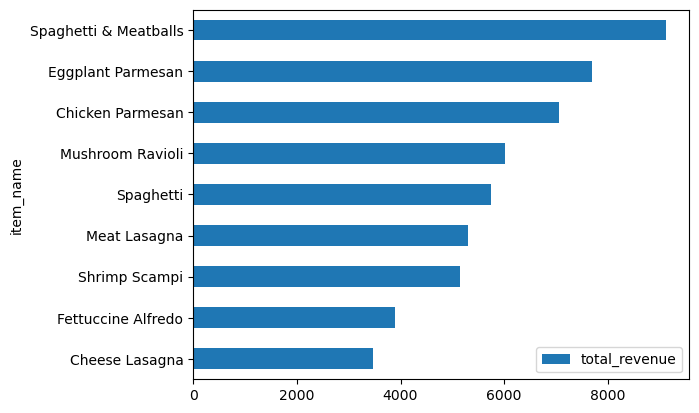

In [13]:
(order_items_df
 .query ("category == 'Italian'")
 .groupby("item_name")
 .agg({"total_revenue": "sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
)

### Analyzing Busiest Times:

In [17]:
order_items_df.set_index("order_timestamp")

,order_details_id,order_id,item_id,item_name,category,price,sales_tax,total_revenue
order_timestamp,,,,,,,,
2023-01-01 11:38:00,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
2023-01-01 11:57:00,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2023-01-01 11:57:00,3,2,124.0,Spaghetti,Italian,14.50,1.16,15.66
2023-01-01 11:57:00,4,2,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
2023-01-01 11:57:00,5,2,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
...,...,...,...,...,...,...,...,...
2023-03-31 22:05:00,12230,5369,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
2023-03-31 22:05:00,12231,5369,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74
2023-03-31 22:05:00,12232,5369,120.0,Steak Torta,Mexican,13.95,1.12,15.07


<Axes: xlabel='order_timestamp'>

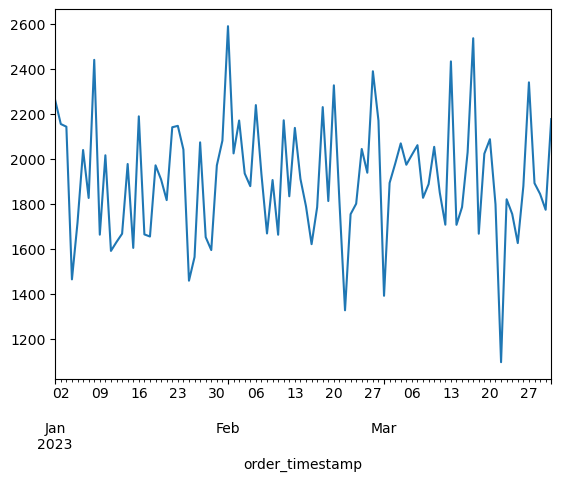

In [16]:
order_items_df.set_index("order_timestamp").resample("D") ["total_revenue"].sum().plot()

In [18]:
order_items_df["dayofweek"] = order_items_df.order_timestamp.dt.dayofweek
order_items_df["hour"] = order_items_df.order_timestamp.dt.hour

order_items_df.head()

,order_timestamp,order_details_id,order_id,item_id,item_name,category,price,sales_tax,total_revenue,dayofweek,hour
0,2023-01-01 11:38:00,1,1,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39,6,11
1,2023-01-01 11:57:00,2,2,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66,6,11
2,2023-01-01 11:57:00,3,2,124.0,Spaghetti,Italian,14.50,1.16,15.66,6,11
3,2023-01-01 11:57:00,4,2,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99,6,11
4,2023-01-01 11:57:00,5,2,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74,6,11


<Axes: xlabel='dayofweek', ylabel='hour'>

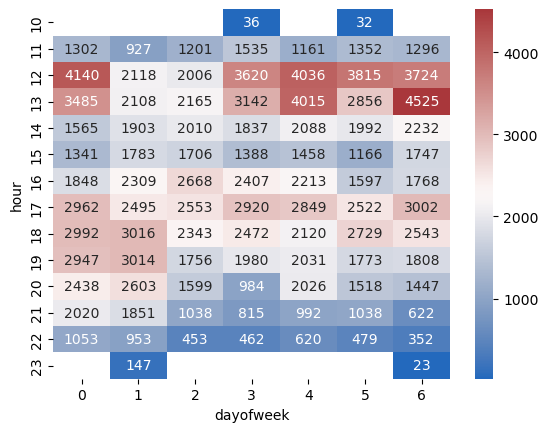

In [27]:
import seaborn as sns
sns.heatmap(order_items_df.pivot_table(
    index="hour",
    columns = "dayofweek",
    values = "total_revenue",
    aggfunc="sum"
).round(), 
    annot=True, 
    fmt="g",
    cmap="vlag"
)